#### Insurance classification


In [1]:
import pandas as pd
import numpy as np
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Notebook params
plt.style.use('ggplot')
plt.rcParams["figure.figsize"] = (15,10)
plt.rcParams.update({'font.size': 15})

In [3]:
org_data = pd.read_csv('source/data.csv')

print('Dataset shape:',org_data.shape)
with pd.option_context('display.max_columns', None):
    display(org_data.head())

Dataset shape: (10000, 21)


,id,age,gender,race,driving_experience,education,income,credit_score,vehicle_ownership,vehicle_year,married,children,postal_code,annual_mileage,vehicle_type,speeding_violations,DUIs,past_accidents,outcome,telematic_score,monthly_mileage
0,569520,65+,female,majority,0-9y,high school,high,0.629027,True,after 2015,False,True,10238,12000.0,sedan,0,0,0,False,37.454012,1000.000000
1,750365,16-25,male,majority,0-9y,none,very low,0.357757,False,before 2015,False,False,10238,16000.0,sedan,0,0,0,True,95.071431,1333.333333
2,199901,16-25,female,majority,0-9y,high school,low,0.493146,True,before 2015,False,False,10238,11000.0,sedan,0,0,0,False,73.199394,916.666667
3,478866,16-25,male,majority,0-9y,university,low,0.206013,True,before 2015,False,True,32765,11000.0,sedan,0,0,0,False,59.865848,916.666667
4,731664,26-39,male,majority,10-19y,none,low,0.388366,True,before 2015,False,False,32765,12000.0,sedan,2,0,1,True,15.601864,1000.000000


#### EDA

In [22]:
org_data.describe()

,id,credit_score,postal_code,annual_mileage,speeding_violations,DUIs,past_accidents,telematic_score,monthly_mileage
count,10000.000000,9018.000000,10000.000000,9043.000000,10000.000000,10000.00000,10000.000000,10000.000000,9043.000000
mean,500521.906800,0.515813,19864.548400,11697.003207,1.482900,0.23920,1.056300,49.415956,974.750267
std,290030.768758,0.137688,18915.613855,2818.434528,2.241966,0.55499,1.652454,28.763013,234.869544
min,101.000000,0.053358,10238.000000,2000.000000,0.000000,0.00000,0.000000,0.001163,166.666667
25%,249638.500000,0.417191,10238.000000,10000.000000,0.000000,0.00000,0.000000,24.632887,833.333333
50%,501777.000000,0.525033,10238.000000,12000.000000,0.000000,0.00000,0.000000,49.252862,1000.000000
75%,753974.500000,0.618312,32765.000000,14000.000000,2.000000,0.00000,2.000000,74.000635,1166.666667
max,999976.000000,0.960819,92101.000000,22000.000000,22.000000,6.00000,15.000000,99.971767,1833.333333


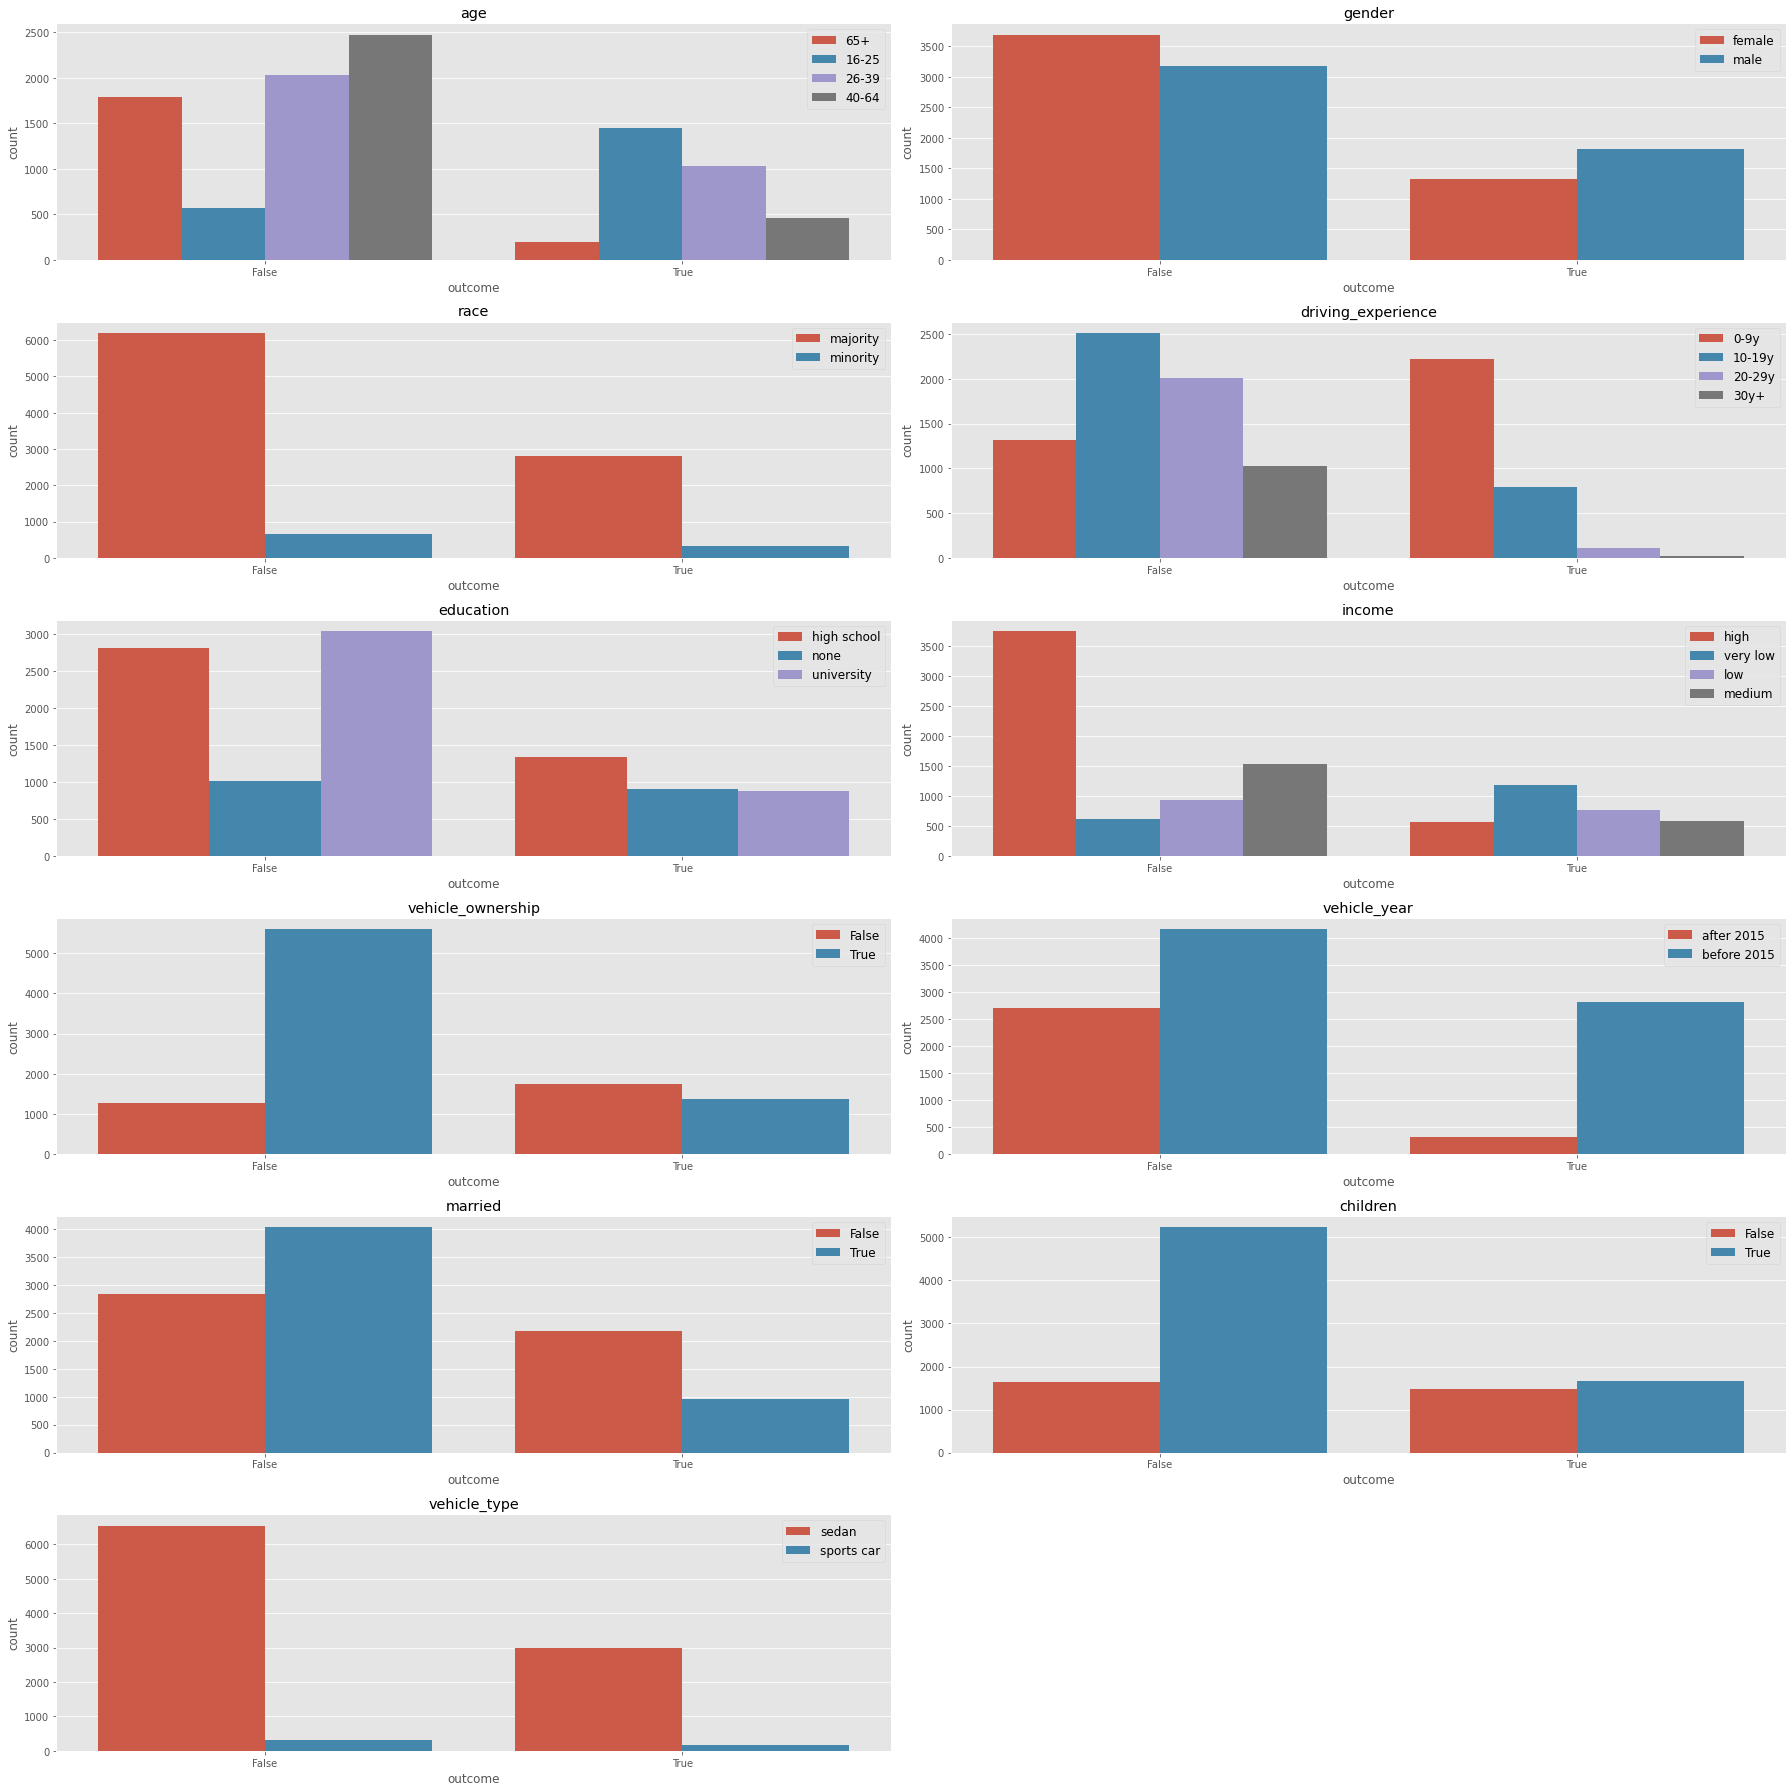

In [35]:
columns_to_omit = ['id', 'credit_score', 'postal_code', 'annual_mileage', 'telematic_score', 'monthly_mileage']
columns_multiclass = ['speeding_violations', 'past_accidents', 'DUIs']
columns_hists = ['credit_score', 'telematic_score', 'monthly_mileage']

def set_axes_cols(column, x_col):
    ''' Setting x_col and hue_col for charts created in "outcome_eda_vis" function '''
    
    if x_col == 'outcome':  hue_col = column
    else:
        if x_col != 'other': print('focus_col parameter not recognized, col "outcome" set as hue') 
        x_col = column
        hue_col = 'outcome'
    return x_col , hue_col

def outcome_eda_vis(df, kind = 'countplot', x_col = 'outcome', fsize = [8,6]):
    '''
    Creating relations visualisation between 'outcome' and other columns
    Function uses seaborn and matplotlib.pyplot libraries

    Params:
    -------
    df: pandas dataframe
    kind: 'countplot' or 'histplot'
    x_col: the column expected to be on X axis. 'outcome', if the point is to see
        distribution of the 'outcome' column or 'other', if the goal is to see how
        in the other columns 'outcome' is distributed  
    fsize: single figure size
    '''
    dfv = df.drop(columns = 'outcome')
    charts_numb = len(dfv.columns)
    fig, ax = plt.subplots(nrows=-(-charts_numb // 2), ncols=2, figsize=(fsize)) # rounding-up
    
    if focus_col == 'label':
        x_col = column

    for i, column in enumerate(dfv.columns):
        if i < charts_numb:
            axx = i//2
            axy = i%2
            x_col , hue_col = set_axes_cols(column, x_col)
            if kind == 'histplot':
                g = sns.histplot(data=df, x=x_col, hue=hue_col, multiple='dodge', ax=ax[axx,axy])
            else:
                if kind != 'countplot': print('kind parameter not recognized, creating countplots')
                g = sns.countplot(data=df, x=x_col, hue=hue_col, ax=ax[axx,axy])
                g.legend(loc='upper right', fontsize = 'large')
            ax[axx, axy].set_title(column)

    # if number of charts is uneven, hide the last one, which is blank
    if charts_numb%2 != 0: ax[charts_numb//2,1].set_visible(False)

    fig.tight_layout()
    plt.show()


# Visualizing categorical columns
df_categs = org_data.drop(columns=columns_to_omit).drop(columns=columns_multiclass)
outcome_eda_vis(df_categs, kind='countplot', fsize=[25,25])

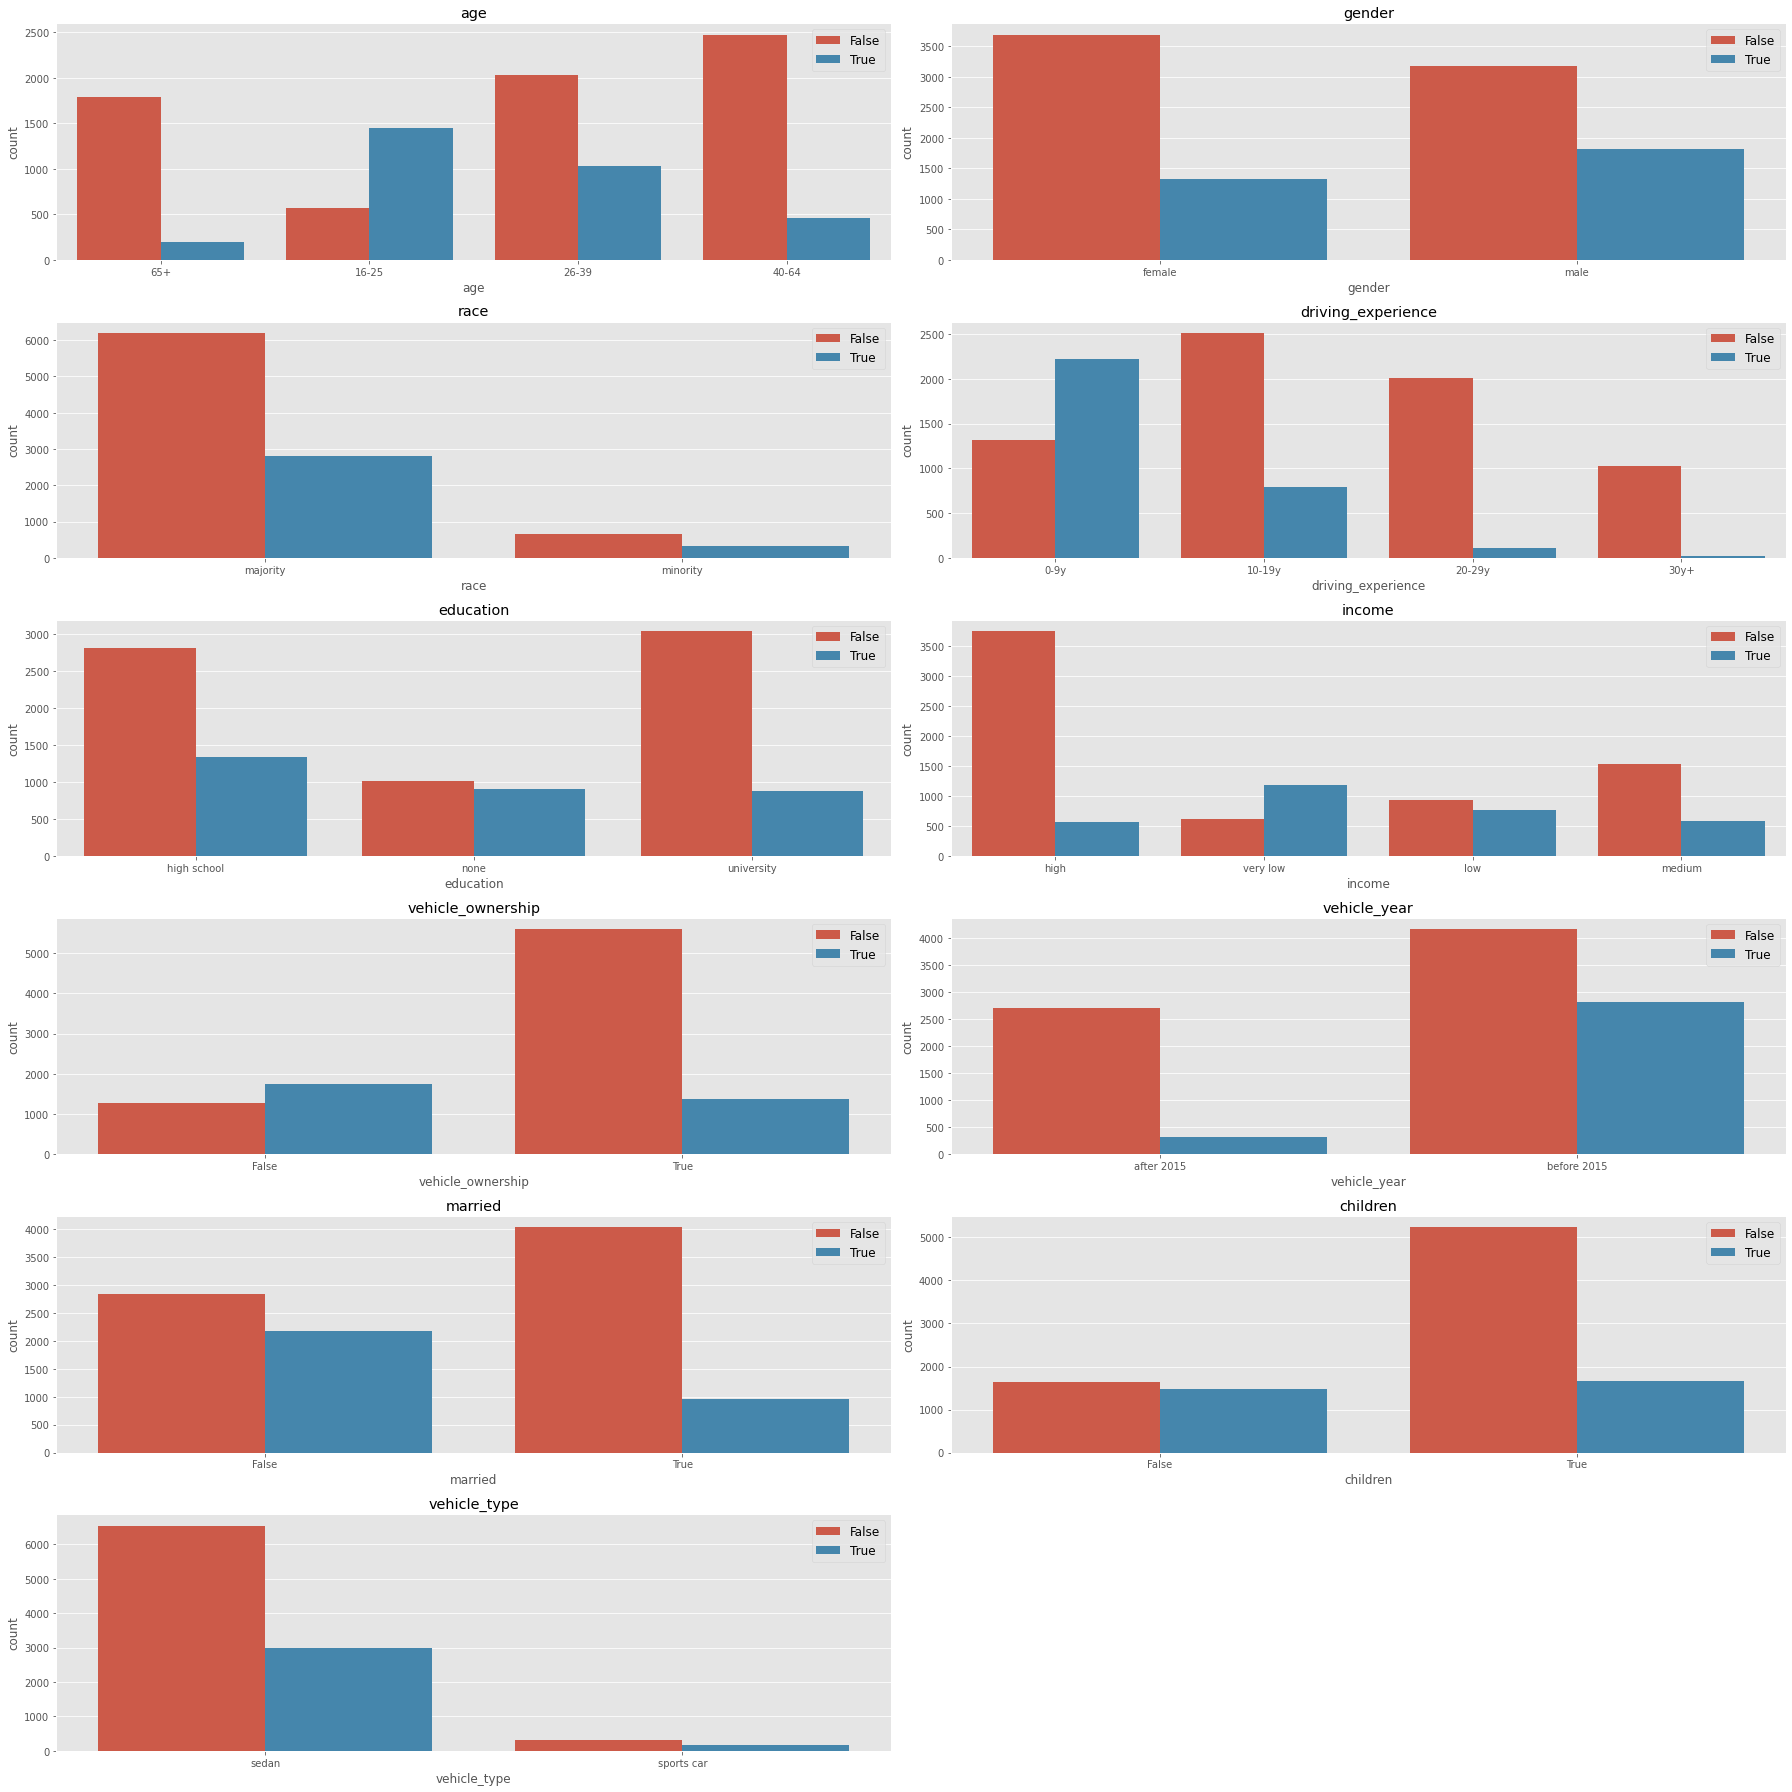

In [36]:
# Visualizing categorical columns
outcome_eda_vis(df_categs, kind='countplot', focus_col = 'other', fsize=[25,25])

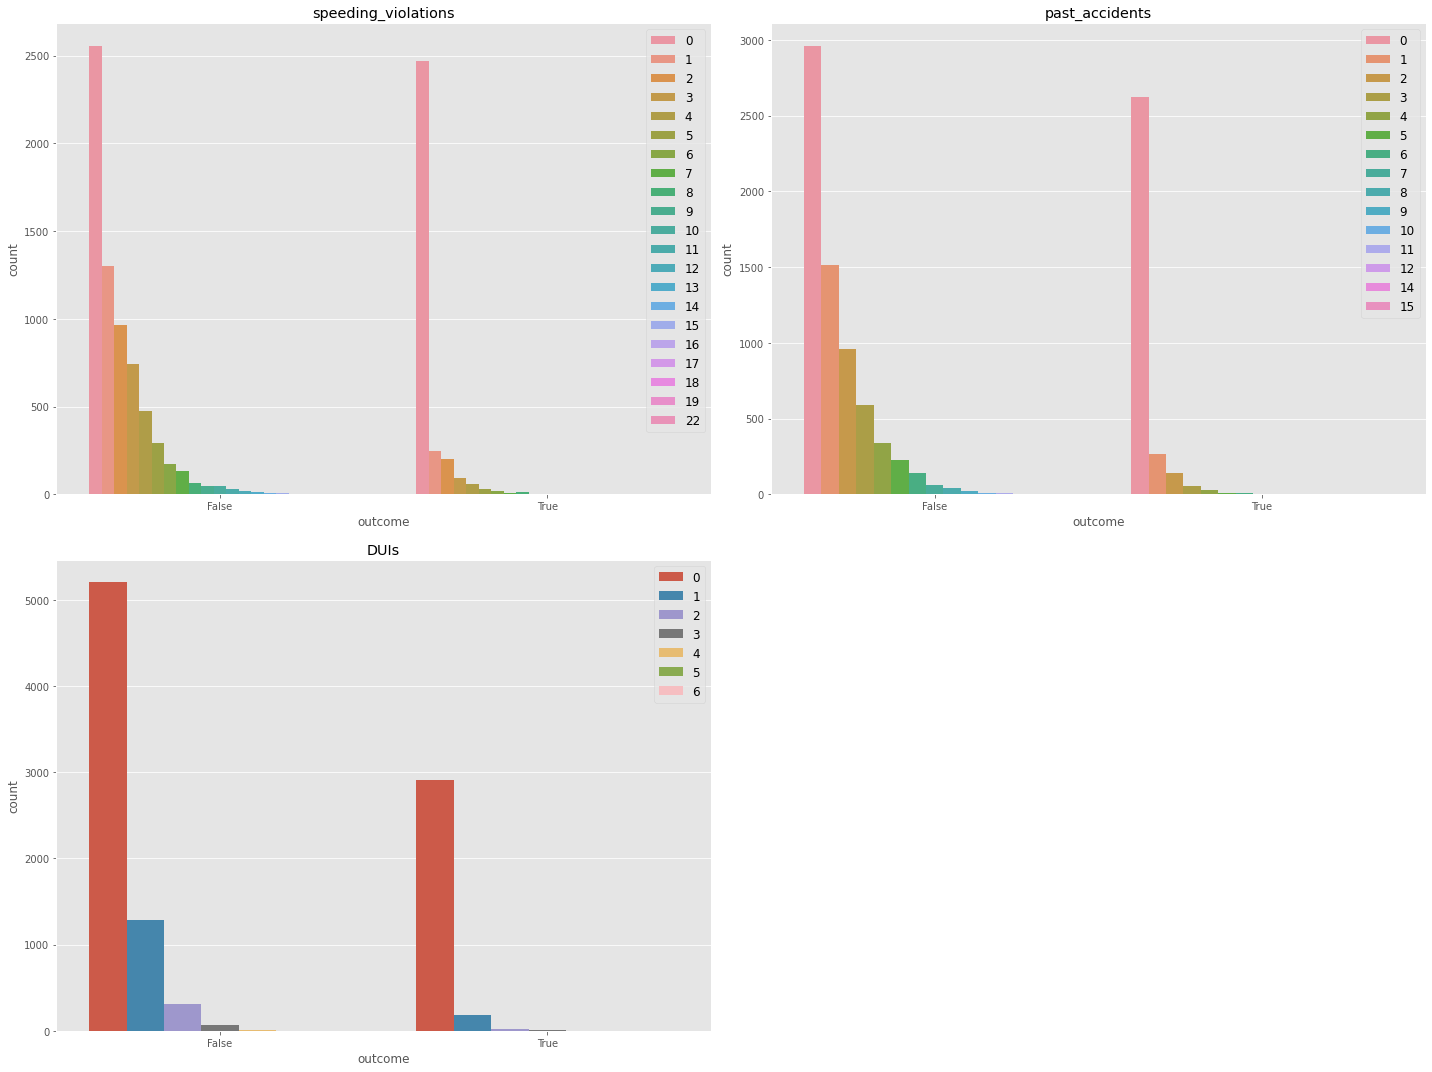

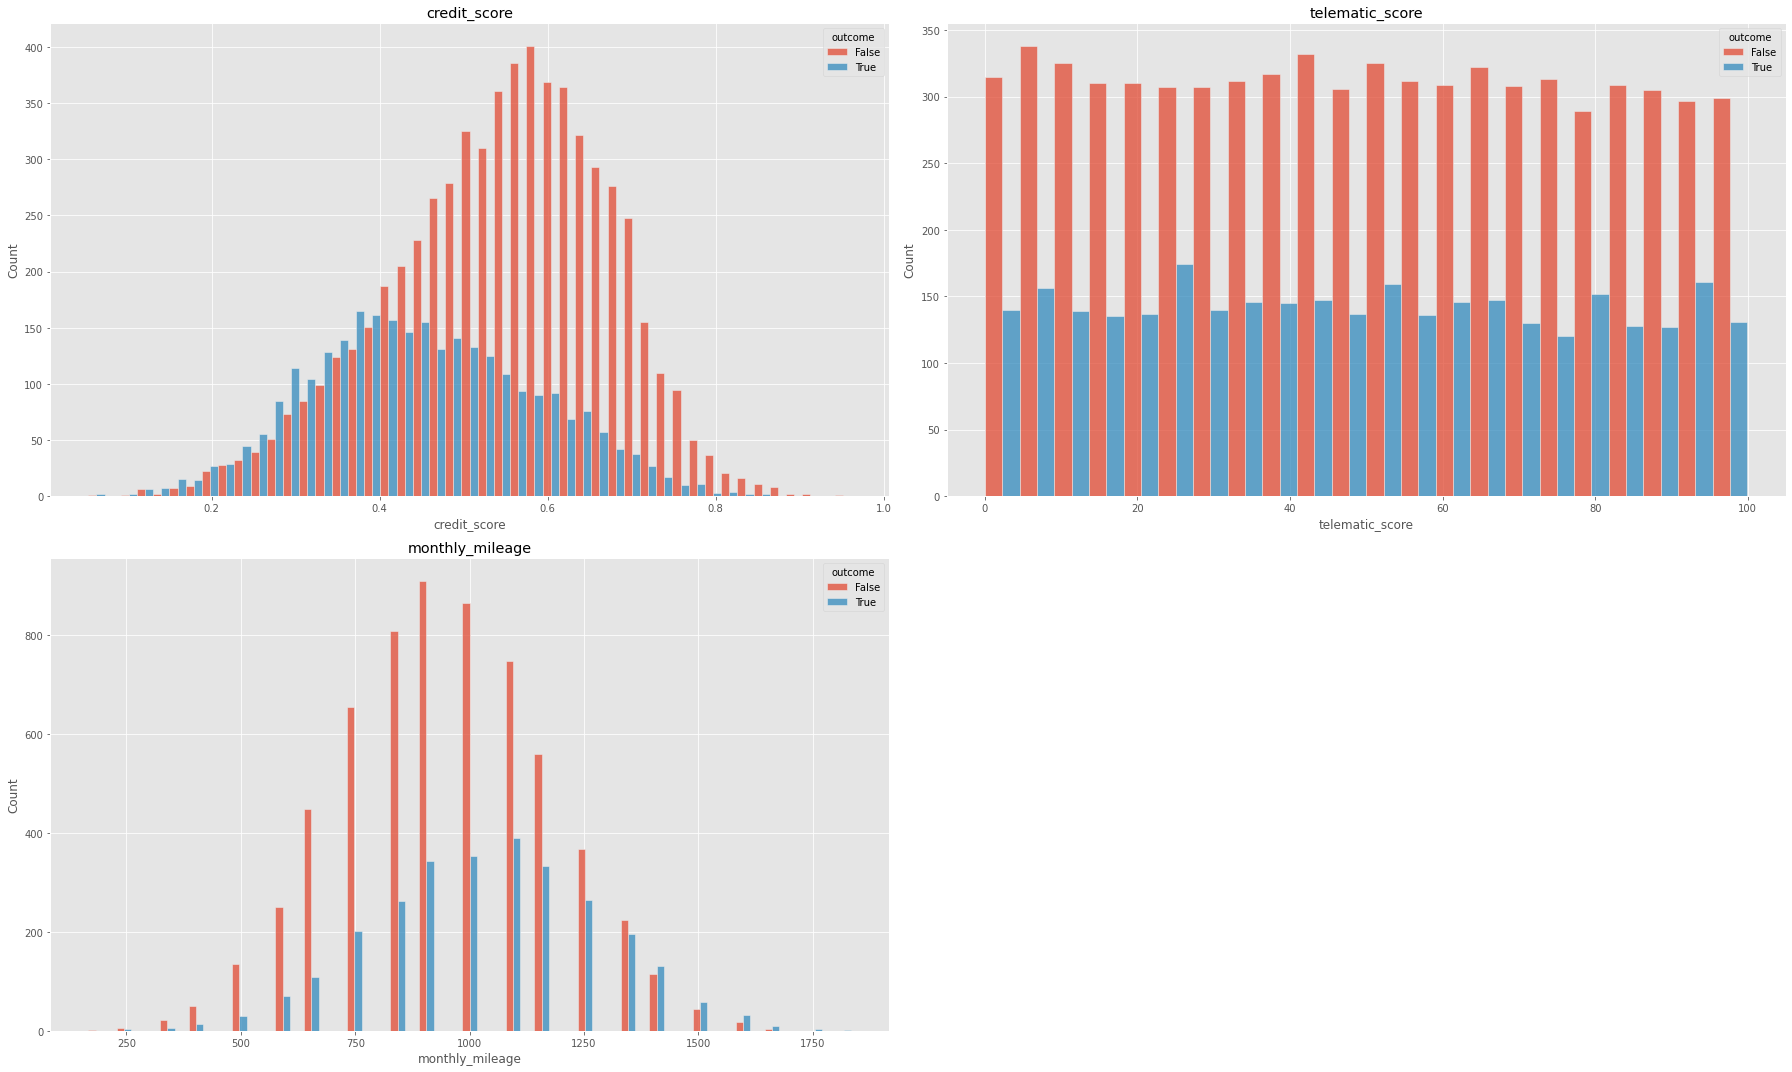

In [37]:
# Visualizing categorical columns with a lot of classes
columns_multiclass.append('outcome')
outcome_eda_vis(org_data[columns_multiclass], kind='countplot', fsize=[20,15])

# Visualizing histograms
columns_hists.append('outcome')
outcome_eda_vis(org_data[columns_hists], kind='histplot', focus_col = 'other', fsize=[25,15])

Notes:
- telematic_score: Interestingly, the score seems to have no major influence on the outcome 
- vehicle_year: over 40% of vehicles older than 2015 have made a claim. On the contrary, just 10-15% of older vehicles made one
- driving_experience: young drivers often make a claim

- customers perceived as "more responsible ones", i.e. married and with children, make less claims